In [1]:
# Predictive Modeling of Economic Impact of Tourism in China and South Korea

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Load the data
data = pd.read_csv('predictive_modeling.csv')
print(data.head())

                                     Series Name     Series Code Country Name  \
0  International tourism, receipts (current US$)  ST.INT.RCPT.CD  Korea, Rep.   
1  International tourism, receipts (current US$)  ST.INT.RCPT.CD        China   

  Country Code          1995          1996         1997         1998  \
0          KOR  6.670000e+09  6.350000e+09   6317000000   8263000000   
1          CHN           NaN           NaN  12626000000  13229000000   

          1999         2000  ...          2011          2012          2013  \
0   8337000000   8527000000  ...  1.732900e+10  1.873100e+10  1.945700e+10   
1  15006000000  17318000000  ...           NaN           NaN           NaN   

           2014          2015          2016          2017          2018  \
0  2.239000e+10  1.871100e+10  2.092400e+10  1.717300e+10  2.310400e+10   
1           NaN           NaN           NaN           NaN           NaN   

           2019          2020  
0  2.545600e+10  1.177600e+10  
1           Na

In [10]:
# Check for unique series names
print("Unique Series Names in the Dataset:")
print(data['Series Name'].unique())

# Filter for the relevant series
data = data[data['Series Name'] == 'International tourism, receipts (current US$)']

# Melt the dataframe to long format
data_long = pd.melt(data, id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
                    var_name='year', value_name='value')

# Extract year from the 'year' column and convert to datetime
data_long['year'] = data_long['year'].str.extract('(\d{4})')[0]
data_long['year'] = pd.to_datetime(data_long['year'], format='%Y')
print(data_long.head())

Unique Series Names in the Dataset:
['International tourism, receipts (current US$)']
  Country Name Country Code                                    Series Name  \
0  Korea, Rep.          KOR  International tourism, receipts (current US$)   
1        China          CHN  International tourism, receipts (current US$)   
2  Korea, Rep.          KOR  International tourism, receipts (current US$)   
3        China          CHN  International tourism, receipts (current US$)   
4  Korea, Rep.          KOR  International tourism, receipts (current US$)   

      Series Code       year         value  
0  ST.INT.RCPT.CD 1995-01-01  6.670000e+09  
1  ST.INT.RCPT.CD 1995-01-01           NaN  
2  ST.INT.RCPT.CD 1996-01-01  6.350000e+09  
3  ST.INT.RCPT.CD 1996-01-01           NaN  
4  ST.INT.RCPT.CD 1997-01-01  6.317000e+09  


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
/var/folders/mr/8fy55g6d1hb_jh6n0jk6_y6c0000gn/T/ipykernel_35219/338890650.py:13: SyntaxWarning: invalid escape sequence '\d'
  data_long['year'] = data_long['year'].str.extract('(\d{4})')[0]


In [11]:
# Pivot the dataframe
data_pivot = data_long.pivot_table(index=['Country Name', 'Country Code', 'year'], 
                                   columns='Series Name', values='value').reset_index()

# Forward fill missing values as an example
data_pivot.fillna(method='ffill', inplace=True)
print(data_pivot.head())

Series Name Country Name Country Code       year  \
0                  China          CHN 1997-01-01   
1                  China          CHN 1998-01-01   
2                  China          CHN 1999-01-01   
3                  China          CHN 2000-01-01   
4                  China          CHN 2001-01-01   

Series Name  International tourism, receipts (current US$)  
0                                             1.262600e+10  
1                                             1.322900e+10  
2                                             1.500600e+10  
3                                             1.731800e+10  
4                                             1.900600e+10  


/var/folders/mr/8fy55g6d1hb_jh6n0jk6_y6c0000gn/T/ipykernel_35219/518527875.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_pivot.fillna(method='ffill', inplace=True)


In [16]:
# Filter for China data and drop missing values
china_data = data_pivot[data_pivot['Country Name'] == 'China'].copy()
china_data.dropna(inplace=True)
china_data['year'] = china_data['year'].dt.year
print(china_data.head())
print(china_data.columns)  # Print the column names to verify

Series Name Country Name Country Code  year  \
0                  China          CHN  1997   
1                  China          CHN  1998   
2                  China          CHN  1999   
3                  China          CHN  2000   
4                  China          CHN  2001   

Series Name  International tourism, receipts (current US$)  
0                                             1.262600e+10  
1                                             1.322900e+10  
2                                             1.500600e+10  
3                                             1.731800e+10  
4                                             1.900600e+10  
Index(['Country Name', 'Country Code', 'year',
       'International tourism, receipts (current US$)'],
      dtype='object', name='Series Name')


In [17]:
# Define features and target
features = ['International tourism, receipts (current US$)']  # Adjusted to match the actual column name
target = 'International tourism, receipts (current US$)'  # Adjusted to match the actual column name

# Since 'Tourism Receipts' is the only feature and target, we'll use it directly
X = china_data[features]
y = china_data[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [19]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")

MSE: 0.0
R2: 1.0


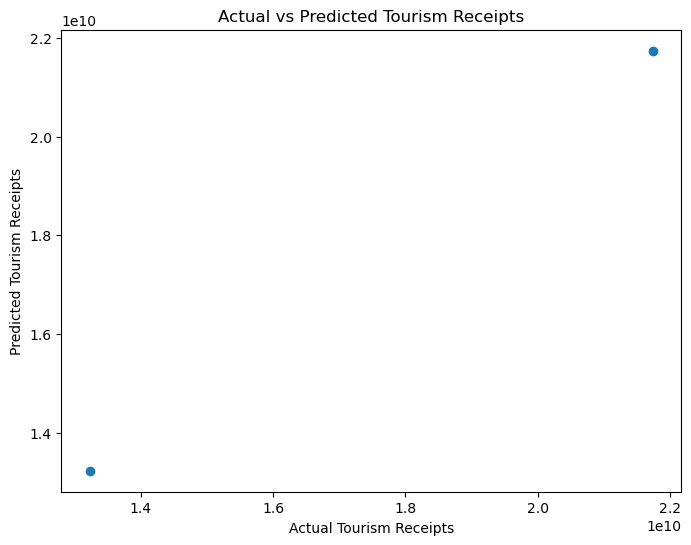

In [20]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Tourism Receipts')
plt.ylabel('Predicted Tourism Receipts')
plt.title('Actual vs Predicted Tourism Receipts')
plt.show()

In [23]:
# Make future predictions
# Using the last known value as the base for prediction
last_known_value = china_data['International tourism, receipts (current US$)'].values[-1]

future_years = pd.DataFrame({'International tourism, receipts (current US$)': [last_known_value, last_known_value]})
future_predictions = model.predict(future_years)

print(f"Future Predictions: {future_predictions}")

Future Predictions: [2.7755e+10 2.7755e+10]
